In [80]:
import numpy as np
import pandas as pd
from fractions import Fraction
from math import floor, gcd, log
import math
from qiskit import transpile
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [81]:
def ModularExponentiation(power):
    """
    This function does modular exponentiation (a^r mod N) Given N = 15, and A is any coprime to N, so A = {2,4,7,11,13,14}, I chose here 2
    so this is the hard coded exponentiation for it.
    """
    U  = QuantumCircuit(4)
    for i in range(power): 
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
    U = U.to_gate()
    U.name = "Uf"
    cu = U.control()
    return cu

In [82]:
def QFTdagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)),m,j)
        qc.h(j)
    qc.name = "QFT Dagger"
    return qc

In [83]:
Qubits = 8
qc = QuantumCircuit(Qubits+4, Qubits)

for i in range(Qubits):
    qc.h(i)

qc.x(Qubits)

for q in range(Qubits):
    qc.append(ModularExponentiation(2**q), [q] + [i + Qubits for i in range(4)])

qc.append(QFTdagger(Qubits), range(Qubits))
qc.measure(range(Qubits), range(Qubits))
qc.draw('text')

┌───┐                                                        »
 q_0: ┤ H ├───■────────────────────────────────────────────────────»
      ├───┤   │                                                    »
 q_1: ┤ H ├───┼──────■─────────────────────────────────────────────»
      ├───┤   │      │                                             »
 q_2: ┤ H ├───┼──────┼──────■──────────────────────────────────────»
      ├───┤   │      │      │                                      »
 q_3: ┤ H ├───┼──────┼──────┼──────■───────────────────────────────»
      ├───┤   │      │      │      │                               »
 q_4: ┤ H ├───┼──────┼──────┼──────┼──────■────────────────────────»
      ├───┤   │      │      │      │      │                        »
 q_5: ┤ H ├───┼──────┼──────┼──────┼──────┼──────■─────────────────»
      ├───┤   │      │      │      │      │      │                 »
 q_6: ┤ H ├───┼──────┼──────┼──────┼──────┼──────┼──────■──────────»
      ├───┤   │      │      │      │      │      │      │          »
 q_7: ┤ H ├───┼──────┼──────┼──────┼──────┼──────┼──────┼──────■───»
      ├───┤┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐┌──┴──┐»
 q_8: ┤ X ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├»
      └───┘│     ││     ││     ││     ││     ││     ││     ││     │»
 q_9: ─────┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├»
           │  Uf ││  Uf ││  Uf ││  Uf ││  Uf ││  Uf ││  Uf ││  Uf │»
q_10: ─────┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├»
           │     ││     ││     ││     ││     ││     ││     ││     │»
q_11: ─────┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├»
           └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘»
 c: 8/═════════════════════════════════════════════════════════════»
                                                                   »
«      ┌─────────────┐┌─┐                     
« q_0: ┤0            ├┤M├─────────────────────
«      │             │└╥┘┌─┐                  
« q_1: ┤1            ├─╫─┤M├──────────────────
«      │             │ ║ └╥┘┌─┐               
« q_2: ┤2            ├─╫──╫─┤M├───────────────
«      │             │ ║  ║ └╥┘┌─┐            
« q_3: ┤3            ├─╫──╫──╫─┤M├────────────
«      │  QFT Dagger │ ║  ║  ║ └╥┘┌─┐         
« q_4: ┤4            ├─╫──╫──╫──╫─┤M├─────────
«      │             │ ║  ║  ║  ║ └╥┘┌─┐      
« q_5: ┤5            ├─╫──╫──╫──╫──╫─┤M├──────
«      │             │ ║  ║  ║  ║  ║ └╥┘┌─┐   
« q_6: ┤6            ├─╫──╫──╫──╫──╫──╫─┤M├───
«      │             │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
« q_7: ┤7            ├─╫──╫──╫──╫──╫──╫──╫─┤M├
«      └─────────────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
« q_8: ────────────────╫──╫──╫──╫──╫──╫──╫──╫─
«                      ║  ║  ║  ║  ║  ║  ║  ║ 
« q_9: ────────────────╫──╫──╫──╫──╫──╫──╫──╫─
«                      ║  ║  ║  ║  ║  ║  ║  ║ 
«q_10: ────────────────╫──╫──╫──╫──╫──╫──╫──╫─
«                      ║  ║  ║  ║  ║  ║  ║  ║ 
«q_11: ────────────────╫──╫──╫──╫──╫──╫──╫──╫─
«                      ║  ║  ║  ║  ║  ║  ║  ║ 
« c: 8/════════════════╩══╩══╩══╩══╩══╩══╩══╩═
«                      0  1  2  3  4  5  6  7

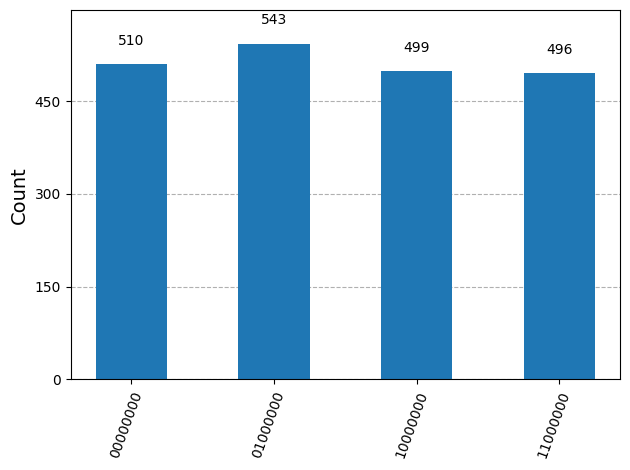

In [84]:
backend = AerSimulator()
tqc = transpile(qc, backend)
job = backend.run(tqc, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Analyze measurement results, as it peaks close to N*(j/r), J is an integer, N is the Control Bits number, in our case here it is 8

In [85]:
measured_int = int(max(counts, key=counts.get),2)
print(f"Measured int: {measured_int}")

if measured_int ==0:
    print("This is trivial case, Run it again!")
else:
    phase = measured_int/ 2**Qubits
    frac = Fraction(phase).limit_denominator(15)
    r = frac.denominator
    print(f"Period (r) = {r}")
    if r % 2 != 0:
        print("Period is odd try different A")
    else:
       p = gcd(int(2**(r/2) + 1), 15)
       q = gcd(int(2**(r/2) - 1), 15)

print(f"Finaly factors = {p} and {q}")

Measured int: 64
Period (r) = 4
Finaly factors = 5 and 3
